In [6]:
import os
import time
import warnings

warnings.filterwarnings("ignore")

import numpy as np
import matplotlib.pyplot as plt
import keras
import tensorflow as tf

from PIL import Image, ImageEnhance
from sklearn.preprocessing import StandardScaler

from keras import datasets, layers, models
from keras.models import Sequential, Model
from keras.layers import Conv2D, Input, Dropout, AveragePooling2D, Flatten, MaxPooling2D, Dense, GlobalAveragePooling2D

# metrics
from sklearn.metrics import accuracy_score, classification_report, roc_curve


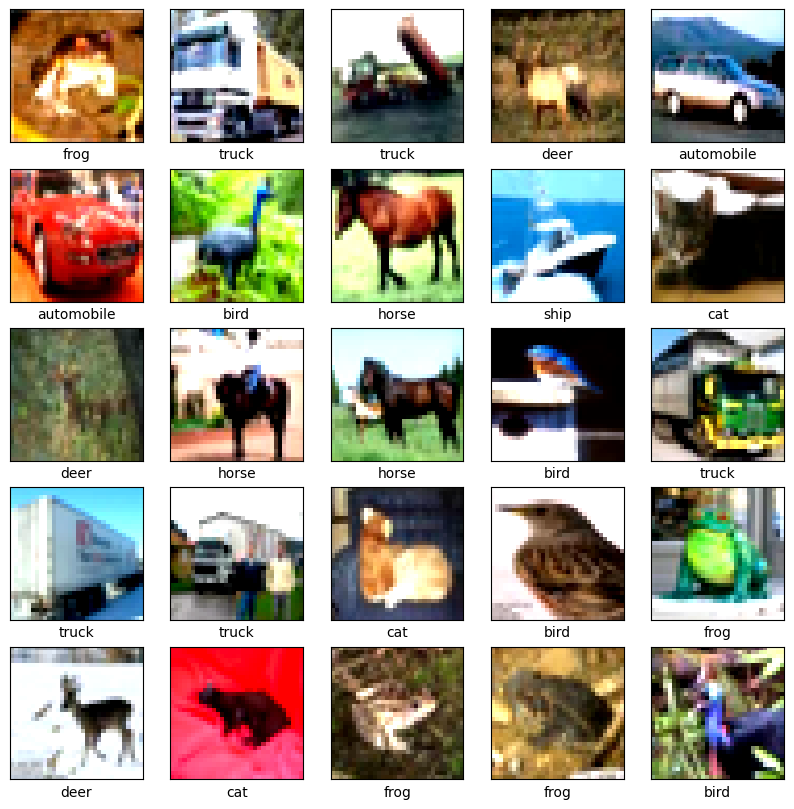

In [9]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# image pre-processing
train_images, test_images = train_images / 255.0, test_images / 255.0
for i in range(len(train_images)):
    img = Image.fromarray((train_images[i] * 255).astype(np.uint8))
    # Adjust brightness
    brightness_factor = 1.2
    img = ImageEnhance.Brightness(img).enhance(brightness_factor)
    # Adjust contrast
    contrast_factor = 1.5
    img = ImageEnhance.Contrast(img).enhance(contrast_factor)
    train_images[i] = np.array(img) / 255.0

for i in range(len(test_images)):
    img = Image.fromarray((test_images[i] * 255).astype(np.uint8))
    # Adjust brightness
    brightness_factor = 1.2
    img = ImageEnhance.Brightness(img).enhance(brightness_factor)
    # Adjust contrast
    contrast_factor = 1.5
    img = ImageEnhance.Contrast(img).enhance(contrast_factor)
    test_images[i] = np.array(img) / 255.0

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [10]:
model = models.Sequential()
model.add(layers.Conv2D(32, 3, padding = "same", activation='relu', input_shape=(32, 32, 3)))
model.add(layers.Conv2D(32, 3, activation="relu"))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(64, 3, padding = "same", activation='relu'))
model.add(layers.Conv2D(64, 3, activation = "relu"))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation = "softmax"))
model.summary()

model.compile(optimizer = 'adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath='/content/final_model.h5',
    save_weights_only=False,
    monitor='val_accuracy',
    mode='max', verbose=1,
    save_best_only=True)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 conv2d_5 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 dropout_3 (Dropout)         (None, 15, 15, 32)        0         
                                                                 
 conv2d_6 (Conv2D)           (None, 15, 15, 64)        18496     
                                                                 
 conv2d_7 (Conv2D)           (None, 13, 13, 64)        36928     
                                                      

In [11]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, callbacks=[model_checkpoint_callback],
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - ETA: 0s - loss: 1.4835 - accuracy: 0.4542
Epoch 1: val_accuracy improved from -inf to 0.55380, saving model to /content/final_model.h5
1563/1563 [==============================] - 245s 156ms/step - loss: 1.4835 - accuracy: 0.4542 - val_loss: 1.2651 - val_accuracy: 0.5538
Epoch 2/10
1563/1563 [==============================] - ETA: 0s - loss: 1.1205 - accuracy: 0.6014
Epoch 2: val_accuracy improved from 0.55380 to 0.66480, saving model to /content/final_model.h5
1563/1563 [==============================] - 233s 149ms/step - loss: 1.1205 - accuracy: 0.6014 - val_loss: 0.9511 - val_accuracy: 0.6648
Epoch 3/10
1563/1563 [==============================] - ETA: 0s - loss: 0.9786 - accuracy: 0.6562
Epoch 3: val_accuracy improved from 0.66480 to 0.69120, saving model to /content/final_model.h5
1563/1563 [==============================] - 227s 145ms/step - loss: 0.9786 - accuracy: 0.6562 - val_loss: 0.8757 - val_accuracy: 0.6912
Epoch 4/10

In [12]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

313/313 - 18s - loss: 0.7004 - accuracy: 0.7612 - 18s/epoch - 58ms/step


In [14]:
print(f"Model accuracy of test data: {test_acc}")

Model accuracy of test data: 0.7612000107765198


In [15]:
y_pred = np.argmax(model.predict(test_images), axis=-1)
# classification report
print(classification_report(test_labels, y_pred, target_names = class_names))


313/313 [==============================] - 12s 38ms/step
              precision    recall  f1-score   support

    airplane       0.73      0.83      0.78      1000
  automobile       0.81      0.92      0.86      1000
        bird       0.74      0.62      0.68      1000
         cat       0.58      0.56      0.57      1000
        deer       0.77      0.69      0.73      1000
         dog       0.68      0.68      0.68      1000
        frog       0.76      0.86      0.81      1000
       horse       0.79      0.84      0.81      1000
        ship       0.87      0.84      0.85      1000
       truck       0.89      0.78      0.83      1000

    accuracy                           0.76     10000
   macro avg       0.76      0.76      0.76     10000
weighted avg       0.76      0.76      0.76     10000



Models overall accuracy of test data is 76%. With validation accuracy still increasing, it is possible to train the model to better accuracy before deployment (for at least 20 epochs).

Ajustment in contrast and brightness of original images have raised the accuray by 6 values from 70% to 76%. This indicates further pre-processing of images can improve accuracy.

However, with time contrains on this work, we will deploy our model here on Flask.